
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [14]:

import numpy as np
import matplotlib.pyplot as plt


In [15]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it
class StandardScalerManual:
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)

    def transform(self, X):
        return (X - self.mean) / (self.std + 1e-8)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [16]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.w = None
        self.b = None
        self.losses = []

    def fit(self, X, y):
        n, d = X.shape

        # Initialize parameters
        self.w = np.zeros(d)
        self.b = 0.0

        for _ in range(self.epochs):
            # Forward pass
            y_pred = X @ self.w + self.b

            # Error
            error = y_pred - y

            # Gradients
            dw = (2 / n) * (X.T @ error) + 2 * self.l2_lambda * self.w
            db = (2 / n) * np.sum(error)

            # Parameter update
            self.w -= self.lr * dw
            self.b -= self.lr * db

            # Loss (MSE + L2)
            loss = np.mean(error ** 2) + self.l2_lambda * np.sum(self.w ** 2)
            self.losses.append(loss)

    def predict(self, X):
        return X @ self.w + self.b



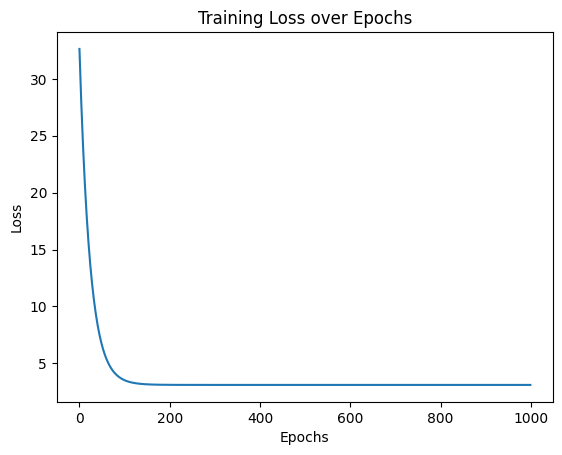

In [17]:
data = np.random.randn(100)
N = 500 # number of samples
d = 3 # number of features
X = np.random.randn(N, d)
w_actual = np.array([3.5, -2.0, 4.0])
b_actual = 1.5
y = X @ w_actual + b_actual + np.random.randn(N) * 0.5  # adding some noise
scaler = StandardScalerManual()
X = scaler.fit_transform(X)
model = LinearRegressionManual(lr=0.01, epochs=1000, l2_lambda=0.1)
model.fit(X, y)
y_pred = model.predict(X)
plt.plot(model.losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

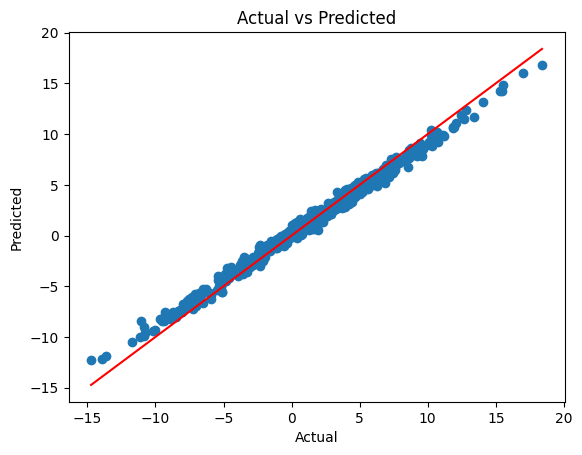

In [18]:
y_pred = model.predict(X)
plt.scatter(y, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red')  # line y=x
plt.show()


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [19]:

#Implement sigmoid function as told in the lectures
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [20]:

#Implement Logistic Regression from scratch and here also add the regularizaation term
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.w = None
        self.b = None
        self.losses = []

    def fit(self, X, y):
        """
        X: (n, d) feature matrix
        y: (n,) binary labels {0,1}
        """
        n, d = X.shape

        # Initialize parameters
        self.w = np.zeros(d)
        self.b = 0.0

        for _ in range(self.epochs):
            # Linear combination
            z = X @ self.w + self.b

            # Prediction probability
            p = sigmoid(z)

            # Gradients
            dw = (1 / n) * (X.T @ (p - y)) + 2 * self.l2_lambda * self.w
            db = (1 / n) * np.sum(p - y)

            # Update parameters
            self.w -= self.lr * dw
            self.b -= self.lr * db

            # Binary cross-entropy loss + L2
            loss = -np.mean(
                y * np.log(p + 1e-8) + (1 - y) * np.log(1 - p + 1e-8)
            )
            loss += self.l2_lambda * np.sum(self.w ** 2)
            self.losses.append(loss)

    def predict_proba(self, X):
        """
        Returns probability of class 1
        """
        z = X @ self.w + self.b
        return sigmoid(z)

    def predict(self, X):
        """
        Returns binary predictions {0,1}
        """
        return (self.predict_proba(X) >= 0.5).astype(int)


In [21]:
data = np.random.randn(100)
N = 500 # number of samples
X = np.random.randn(N, 2)
w_actual = np.array([2.0, -3.0])
b_actual = -0.5
logisticdata = X @ w_actual + b_actual + np.random.randn(N) * 0.5 # adding some noise
probability = sigmoid(logisticdata)
y = (probability > 0.5).astype(int)  # binary labels
scaler = StandardScalerManual()
X = scaler.fit_transform(X)
model = LogisticRegressionManual(lr=0.01, epochs=1000, l2_lambda=0.1)
model.fit(X, y)

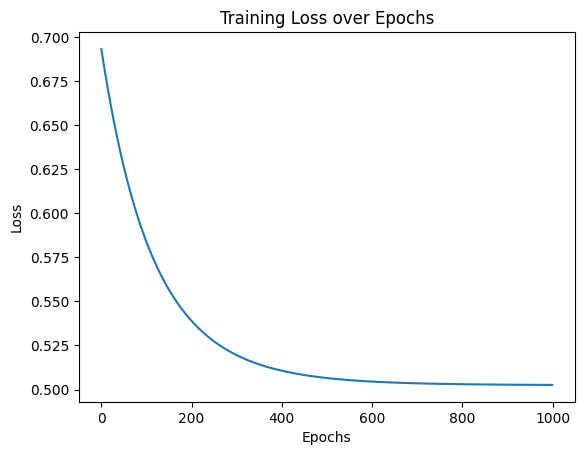

In [22]:
plt.plot(model.losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

In [23]:
accuracy = np.mean(model.predict(X) == y)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 93.80%


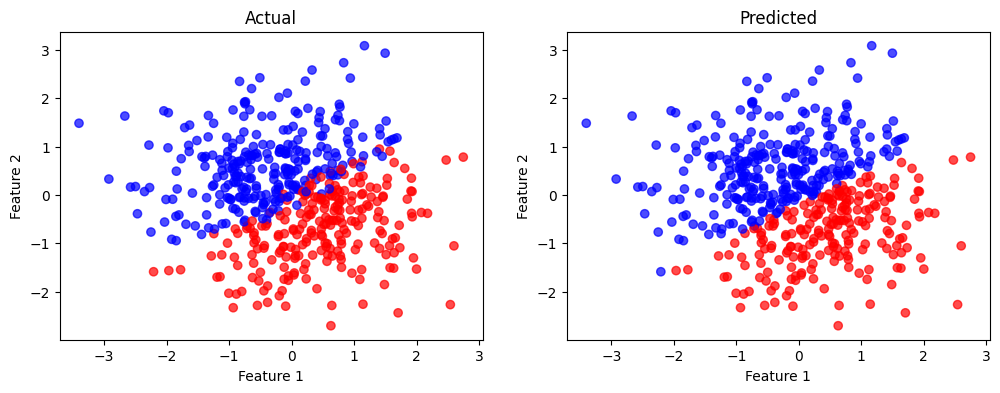

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].scatter(
    X[:,0],
    X[:,1],
    c=y.flatten(),
    cmap="bwr",
    alpha=0.7
)
axs[0].set_title("Actual")
axs[0].set_xlabel("Feature 1")
axs[0].set_ylabel("Feature 2")

axs[1].scatter(
    X[:,0],
    X[:,1],
    c=model.predict(X).flatten(),
    cmap="bwr",
    alpha=0.7
)
axs[1].set_title("Predicted")
axs[1].set_xlabel("Feature 1")
axs[1].set_ylabel("Feature 2")

plt.show()


## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [25]:
# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT !

from sklearn.cluster import KMeans
def kmeans_matrix(M, k, max_iters=100):
    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''
    values = M.reshape(-1, 1)

    kmeans = KMeans(n_clusters=k, max_iter=max_iters, n_init=10, random_state=42)
    labels = kmeans.fit_predict(values)

    centroids = kmeans.cluster_centers_.flatten()
    assignment_table = labels.reshape(M.shape)

    cookbook = {i: [] for i in range(k)}
    for idx, label in enumerate(labels):
        i, j = divmod(idx, M.shape[1])
        cookbook[label].append((i, j))

    return assignment_table, cookbook, centroids


In [26]:
M = np.random.randint(0, 100, (10, 10))
k = 3
assignment_table, cookbook, centroids = kmeans_matrix(M, k)
print("Original Matrix:\n", M)
print("Assignment Table:\n", assignment_table)
print("Centroids:\n", centroids)
print("Cookbook:\n", cookbook)

Original Matrix:
 [[89 66 36 32 61 10 41 43 32 43]
 [35 49 51 83 83 16 80 14 60 50]
 [65 60  3 54 62 50 42 54 35 37]
 [80  6 71  3 78 96  9 70 23 57]
 [47 35 84 51 93 97 13 55 25 87]
 [18 70 69 56 32 41 19 52  6 80]
 [61 64 16 72  7 44 61 19  1 42]
 [45 35 21 41 26 19 61 81 52  9]
 [35 33 14 62 51 68 93 24 60 96]
 [18 38  7 38  3 77 57 18  2 65]]
Assignment Table:
 [[0 0 2 2 2 1 2 2 2 2]
 [2 2 2 0 0 1 0 1 2 2]
 [0 2 1 2 2 2 2 2 2 2]
 [0 1 0 1 0 0 1 0 1 2]
 [2 2 0 2 0 0 1 2 1 0]
 [1 0 0 2 2 2 1 2 1 0]
 [2 0 1 0 1 2 2 1 1 2]
 [2 2 1 2 1 1 2 0 2 1]
 [2 2 1 2 2 0 0 1 2 0]
 [1 2 1 2 1 0 2 1 1 0]]
Centroids:
 [79.11538462 13.17857143 47.15217391]
Cookbook:
 {0: [(0, 0), (0, 1), (1, 3), (1, 4), (1, 6), (2, 0), (3, 0), (3, 2), (3, 4), (3, 5), (3, 7), (4, 2), (4, 4), (4, 5), (4, 9), (5, 1), (5, 2), (5, 9), (6, 1), (6, 3), (7, 7), (8, 5), (8, 6), (8, 9), (9, 5), (9, 9)], 1: [(0, 5), (1, 5), (1, 7), (2, 2), (3, 1), (3, 3), (3, 6), (3, 8), (4, 6), (4, 8), (5, 0), (5, 6), (5, 8), (6, 2), (6, 4), (6


## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
